<span style="color:#864AF9;font-size:25pt;"> <b>  Problem Statement:  </b>  </span>

The case business case is on the inventory management. Keeping
Inventory of spare in various service centre to the market demand is
always a challenge as most service centres spends significant amount
in spare parts inventory costs. In spite of this, availability of spare
parts is been one of the problem areas.

<b> <u> PROJECT GOAL: </u></b>
1. Create Predictive model for inventory forecasting so that
service centre achieve JIT standards.

<span style="color:#864AF9;font-size:25pt;"> <b> 1.Business Case      </b>  </span>

The case business case is on the inventory management. Keeping
Inventory of spare in various service centre to the market demand is
always a challenge as most service centres spends significant amount
in spare parts inventory costs. In spite of this, availability of spare
parts is been one of the problem areas.

<span style="color:#864AF9;font-size:25pt"> <b> 2.Domain Analysis   </b> </span>  

* Invoice Date:<br>
Invoice Date is typically when one signs up for a product or service and generates the bill.

* Job Card Date:<br>
The job card contains all the details about the vehicle and servicing with respect to the job card number, the mechanic who performs the different operations on the vehicle, the date when the vehicle comes for servicing, the date when the servicing is done,the details about the problems encountered by the customer in 

* invoice_line_text : <br>
Spare parts 

<span style="color:#864AF9;font-size:25pt"> <b> 3.Import Statements </b> </span>

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import math
from pandas import Series
import matplotlib.pyplot as plt
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
# AR 
from statsmodels.tsa.ar_model import AutoReg , ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.metrics import mean_absolute_error,mean_squared_error
from random import random
import itertools
import warnings
warnings.filterwarnings("ignore")

<span style="color:#864AF9;font-size:25pt"> <b> 4.Database Connection Establishment </b> </span>

In [2]:
## Making connections to datamites database server.
connection = mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_usdata_sql',
                                  password='37z<49REb&mKnl4AV!vJ')

In [3]:
type(connection)

mysql.connector.connection.MySQLConnection

In [4]:
## Check the number of database available on the server.
cursor = connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_service_data',)


In [5]:
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_usdata_sql',
                                  password='37z<49REb&mKnl4AV!vJ',
                                  database='project_service_data')

In [6]:
pd.read_sql_query("show tables",connection)

,Tables_in_project_service_data
0,service_data


<span style="color:#00FF7F;font-size:18pt;font-family: Arial Black;"> <b> <i> 4.1 Loading the data into pandas dataframe : </i> </b> </span>

In [7]:
inventory = pd.read_sql_query("select * from service_data" , connection)
inventory

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL
...,...,...,...,...,...,...,...
28477,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL


<span style="color:#864AF9;font-size:25pt"> <b> 4.Data Collection </b> </span>

In [8]:
data = inventory.copy()
data

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL
...,...,...,...,...,...,...,...
28477,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL


<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;" > <b> <i> 4.2 Examining the data : </i> </b> </span>

In [9]:
# Find the number of rows and columns.
data.shape

(28482, 7)

<span style="color:#00FF7F;font-size:19pt;font-family: Arial Black;"> <b> <i> 4.3 Columns in dataframe : </i> </b> </span>

In [10]:
# Printing the columns.
data.columns

Index(['invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no',
       'vehicle_model', 'current_km_reading', 'invoice_line_text'],
      dtype='object')

<span style="color:#00BFFF;font-size:18pt;font-family: Arial Black;"> <i> 4.4 Observation :</i><br> </span>
<span style="color:#E238EC;font-size:13pt;font-family:  cursive;"> <i> <br> <b>
    * There are 28482 rows. <br>
    * There are 7 columns. <br>
    * There are no categorical columns. <br>
    * invoice_line_text is the target column. It has the list of inventory .<br> 
    </b> </i> </span>

<span style="color:#864AF9;font-size:25pt"> <b> 5. Basic checks - Data Analysis </b> </span>

#### Lets do some basic checks. Here I check a subset of data by the head method and check if there is any missing data using the info method. 

<span style="color:#00FF7F;font-size:18pt;font-family: Arial Black;"> <b> <i> 5.1 Printing first 5 rows of the dataset </i> </b></span>

In [11]:
# Displaying the first 5 rows of data.
data.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> 5.2 Printing last 5 rows of the dataset </i> </b></span>

In [12]:
# Displaying the last 5 rows of data.
data.tail()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
28477,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL
28481,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,AIR FILTER


<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> 5.3 Displaying the information about the dataset </i> </b> </span>

In [13]:
# Displaying all the information of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   invoice_date           28482 non-null  object
 1   job_card_date          28482 non-null  object
 2   business_partner_name  28482 non-null  object
 3   vehicle_no             28482 non-null  object
 4   vehicle_model          28482 non-null  object
 5   current_km_reading     28482 non-null  object
 6   invoice_line_text      28476 non-null  object
dtypes: object(7)
memory usage: 1.5+ MB


<span style="color:#864AF9;font-size:25pt"> <b> Data Preprocessing </b> </span>


<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Data Cleaning </i> </b></span>

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Checking for NULL Values </i> </b></span>

In [14]:
# Checking if there are NULL values.
data.isnull().sum()

invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
invoice_line_text        6
dtype: int64

In [15]:
data.invoice_line_text.value_counts().head(25)

ENGINE OIL             3802
CHAIN LUBRICATION      3441
GENERAL SERVICE        2142
AIR FILTER             1715
3M OIL                 1628
CONSUMABLES            1595
POLISH                 1245
DISC OIL                991
BRAKE SHOE              965
OIL FILTER              821
DISC PAD                575
WHEEL RUBBER            521
AIR FILTER CHECKUP      467
SPARK PLUG              421
CHAIN SPROCKET          396
SPROCKET RUBBER         347
SPROCKET BEARING        314
CHAIN OVERHAUL          284
CLUTCH CABLE            263
CLUTCH ASSEMBLY         212
CLUTCH COVER GASKET     190
CLUTCH OVERHUAL         163
TANK COVER              134
LABOUR                  131
SEAT COVER              119
Name: invoice_line_text, dtype: int64

In [16]:
data['invoice_line_text'].nunique()

503

In [17]:
# printing all items from invoice_line_text
for item in data.invoice_line_text.unique():
    print(f"'{item}',")

'ENGINE OIL',
'POLISH',
'CONSUMABLES',
'COOLANT OIL',
'CHAIN LUBRICATION',
'4 WAY SWITCH',
'3M OIL',
'GENERAL SERVICE',
'OIL FILTER',
'INDICATOR',
'HEAD REST',
'VALVE GUIDE',
'TIMMING CHAIN',
'FOOT REST',
'LOW BEAM BULB',
'VALVE GRAINDING',
'DISC PAD',
'LOADING GEAR',
'PACKING KIT',
'TIMMING CHAIN PAD',
'TENSIONER',
'CLUTCH BELL REST',
'CLUTCH ASSEMBLY',
'VALVE KIT',
'SPARK PLUG',
'ONE WAY CLUTCH',
'BORE KIT',
'AIR FILTER',
'HEAD RUBBER',
'CLUTCH CABLE',
'CRANK SHAFT',
'BRAKE ADJUSTMENT',
'BRAKE SHOE',
'AIR FILTER CHECKUP',
'DRUM BOLT WASHER',
'TANK CLEANING',
'FORK BEND',
'GEAR SHAFT',
'CLUTCH COVER GASKET',
'INDICATOR BULB',
'GEAR LEVER',
'HANDLEBAR',
'CRASH GUARD',
'FORK OIL SEAL',
'FORK OIL',
'SIDE SHIELD',
'VISIOR',
'FORK CONE SET',
'HEAD LIGHT DOOM',
'TANK ASSEMBLY',
'Clutch cable',
'DISC LEVER',
'CARBURETOR CLEANING',
'SEAT COVER',
'BUZZER',
'TAIL LAMP BULB',
'DISC OIL',
'DISC OVERHUAL',
'MASTER ASSEMBLY',
'CHAIN COVER RUBBER',
'ENGINE GUARD',
'CLUTCH CAM ',
'DOOM',
'WHEEL RUBBE

<span style="color:#00BFFF;font-size:18pt;font-family: Arial Black;"> <i> 5.4 Observation about the invoice_line_text columns:</i><br> </span>
<span style="color:#E238EC;font-size:13pt;font-family:  cursive;"> <i> <br> <b>
    * There are few rows having missing values and empty values. <br>
    * There are extra space in few values.<br>
    * Observed that there are spelling mistakes in the spare parts name. Would recommend the business team to take care of 
      that in future.<br>
    * Also observed that values that is not related to spare parts are being filled in invoice_line_text column. Since this 
      can be an obstacle for the model to give the corret prediction , recommending business team to take of this for the 
      future entries.
    </b> </i> </span>

In [18]:
na_val = data[(data['invoice_line_text'].isnull()) ]
na_val

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
632,15-06-17,14-06-17,naveXXXXXXXXXX,KA53W3XXXX,BAJAJ DISCOVER 150,25677,None
635,15-06-17,14-06-17,naveXXXXXXXXXX,KA53W3XXXX,BAJAJ DISCOVER 150,25677,None
661,15-06-17,14-06-17,kailXXXXXXXXXX,KA01HNXXXX,BAJAJ PULSAR 150,8679,None
769,16-06-17,16-06-17,hariXXXXXXXXXX,KA53ESXXXX,BAJAJ AVENGER STREET,457,None
2579,01-08-17,01-08-17,hariXXXXXXXXXX,KA53EQXXXX,BAJAJ PULSAR 150,9677,None
2613,03-08-17,03-08-17,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,251447,None


In [19]:
empty_val = data[(data['invoice_line_text'] == '') ]
empty_val.shape

(28, 7)

<span style="color:#00BFFF;font-size:18pt;font-family: Arial Black;"> <i> 5.4 Observation about the null columns:</i><br> </span>
<span style="color:#E238EC;font-size:13pt;font-family:  cursive;"> <i> <br> <b>
    * There are 28 rows having no values in invoice_line_text column and <br>
    * There are 6 rows having None as values in invoice_line_text column . <br>
    </b> </i> </span>

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Spell checker, Replace empty space and None value. </i> </b></span>


<span style="color:#E238EC;font-size:15pt;font-family:  cursive;"> <i> <br><b>
    * Replace empty space and None value with Mode Value because <br>
    * Since "ENGINE OIL" is the most wanted among all the spare parts.<br>
    * So "ENGINE OIL" is the first priority to in the inventory list.
    </b> </i> </span>

In [20]:
data.loc[(data['invoice_line_text'].isnull()) == True , 'invoice_line_text' ] = 'ENGINE OIL'         


In [21]:
na_val = data[(data['invoice_line_text'].isnull()) ]
na_val

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text


In [22]:
data.loc[(data['invoice_line_text'] == '' , 'invoice_line_text')] = 'ENGINE OIL'

In [23]:
empty_val = data[(data['invoice_line_text'] == '') ]
empty_val

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text


In [24]:
# data cleaning
data['invoice_line_text'] = data['invoice_line_text'].str.replace('BULB ', 'BULB')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('BODY ', 'BODY')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('OVERHUAL', 'OVERHAUL')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('WIELDING', 'WELDING')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('ENGINE OIL TOPUP', 'ENGINE OIL')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('ASSEBLY', 'ASSEMBLY')

<span style="color:#00BFFF;font-size:18pt;font-family: Arial Black;"> <i> Insight :</i><br> </span>
<span style="color:#E238EC;font-size:13pt;font-family:  cursive;"> <i> <br> <b>
    * Choosing very few mistakes to be corrected as it can contribute to the model performance.<br>
    </b> </i> </span>

In [84]:
grouped_data = data.groupby(['invoice_line_text'])['vehicle_model'].count().reset_index()
grouped_data.rename(columns={'vehicle_model': 'count'}, inplace=True)
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data.head(20)

,invoice_line_text,count
147,ENGINE OIL,3841
75,CHAIN LUBRICATION,3441
207,GENERAL SERVICE,2142
10,AIR FILTER,1715
2,3M OIL,1628
107,CONSUMABLES,1595
344,POLISH,1245
124,DISC OIL,991
46,BRAKE SHOE,965
316,OIL FILTER,821


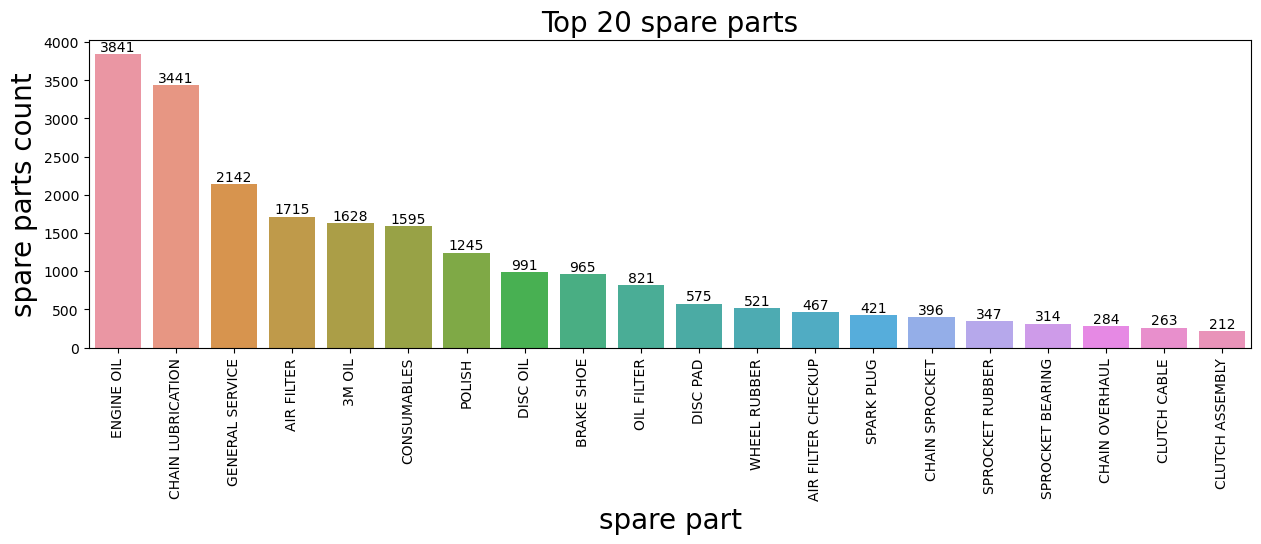

In [26]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 4))

# Create the countplot
sns.countplot(data=data, x='invoice_line_text',
              order=data['invoice_line_text'].value_counts().index[:20],
              ax=ax)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f')
# Set titles and labels with customized fontsizes
ax.set_title('Top 20 spare parts', fontsize=20)
ax.set_ylabel('spare parts count', fontsize=20)
ax.set_xlabel('spare part', fontsize=20)

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()

<span style="color:#00BFFF;font-size:18pt;font-family: Arial Black;"> <i> Insight :</i><br> </span>
<span style="color:#E238EC;font-size:13pt;font-family:  cursive;"> <i> <br> <b>
    * Recommending to make sure to have the below list in the inventory always as it is in demand always.<br>
    * Mandatory spare parts to be kept in inventory are(ENGINE OIL,CHAIN LUBRICATION,GENERAL SERVICE,AIR FILTER,3M OIL,CONSUMABLES,POLISH,DISC OIL,
BRAKE SHOE,OIL FILTER,DISC PAD,WHEEL RUBBER,AIR FILTER CHECKUP,SPARK PLUG,CHAIN SPROCKET,
SPROCKET RUBBER,SPROCKET BEARING,CHAIN OVERHAUL,CLUTCH CABLE,CLUTCH ASSEMBLY)
    </b> </i> </span>

In [27]:
grouped_data = data.groupby(['vehicle_model'])['invoice_line_text'].count().reset_index()
grouped_data.rename(columns={'invoice_line_text': 'count'}, inplace=True)
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data


,vehicle_model,count
12,BAJAJ PULSAR 150,8633
2,BAJAJ AVENGER STREET 220,4212
14,BAJAJ PULSAR 220,2655
13,BAJAJ PULSAR 180,2252
18,BAJAJ PULSAR NS 200,2204
5,BAJAJ CT 100,1432
7,BAJAJ DISCOVER 125,1346
0,BAJAJ AVENGER STREET,1112
11,BAJAJ PLATINA,844
23,BAJAJ V150,686


<span style="color:#00BFFF;font-size:18pt;font-family: Arial Black;"> <i> Insight :</i><br> </span>
<span style="color:#E238EC;font-size:13pt;font-family:  cursive;"> <i> <br> <b>
    * It is observed that people having BAJAJ PULSAR 150 is using more spare parts.<br>    
    </b> </i> </span>

In [28]:
data.vehicle_model.value_counts()

BAJAJ PULSAR 150            8633
BAJAJ AVENGER STREET 220    4212
BAJAJ PULSAR 220            2655
BAJAJ PULSAR 180            2252
BAJAJ PULSAR NS 200         2204
BAJAJ CT 100                1432
BAJAJ DISCOVER 125          1346
BAJAJ AVENGER STREET        1112
BAJAJ PLATINA                844
BAJAJ V150                   686
BAJAJ DISCOVER               679
BAJAJ PULSAR LS135           520
BAJAJ PULSAR AS 200          421
BAJAJ PULSAR NS 160          364
BAJAJ PULSAR RS 200          322
BAJAJ DISCOVER 150           284
BAJAJ AVENGER STREET 180     122
BAJAJ DISCOVER 135           115
BAJAJ V125                    95
BAJAJ V                       54
BAJAJ CALIBER                 40
BAJAJ XCD 125                 27
BAJAJ V15                     23
BAJAJ XCD 135                 13
WAVE                          10
BAJAJ DOMINAR 400 ABS          7
BAJAJ WIND 125                 6
BAJAJ BOXER CT                 4
Name: vehicle_model, dtype: int64

In [29]:
data.columns

Index(['invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no',
       'vehicle_model', 'current_km_reading', 'invoice_line_text'],
      dtype='object')

<span style="color:#864AF9;font-size:25pt"> <b> Load and Explore Time Series Data </b> </span>


<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Load a Time Series Data </i> </b></span>


In [30]:
# Taking necessary columns data dataFrame.
df = data[['job_card_date' , 'vehicle_model' , 'invoice_line_text']]


<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Explore a Time Series Data </i> </b></span>


In [31]:
df.head()

,job_card_date,vehicle_model,invoice_line_text
0,30-05-17,BAJAJ AVENGER STREET 220,ENGINE OIL
1,31-05-17,BAJAJ PULSAR NS 200,ENGINE OIL
2,31-05-17,BAJAJ PULSAR NS 200,POLISH
3,31-05-17,BAJAJ PULSAR NS 200,CONSUMABLES
4,31-05-17,BAJAJ PULSAR NS 200,COOLANT OIL


<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Renaming the columns </i> </b></span>


In [32]:
# renaming some columns
df.rename(columns={"job_card_date":"date", "invoice_line_text":"spare_part"}, inplace=True)
df

,date,vehicle_model,spare_part
0,30-05-17,BAJAJ AVENGER STREET 220,ENGINE OIL
1,31-05-17,BAJAJ PULSAR NS 200,ENGINE OIL
2,31-05-17,BAJAJ PULSAR NS 200,POLISH
3,31-05-17,BAJAJ PULSAR NS 200,CONSUMABLES
4,31-05-17,BAJAJ PULSAR NS 200,COOLANT OIL
...,...,...,...
28477,06-01-19,BAJAJ DISCOVER 125,SPROCKET RUBBER
28478,06-01-19,BAJAJ DISCOVER 125,CLUTCH CABLE
28479,06-01-19,BAJAJ DISCOVER 125,OIL FILTER
28480,06-01-19,BAJAJ DISCOVER 125,DISC OIL


<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Converting the date column from object data type to DateTime format. </i> </b></span>


In [33]:
# changing object(date column) to datetime datatype
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%y')
df

,date,vehicle_model,spare_part
0,2017-05-30,BAJAJ AVENGER STREET 220,ENGINE OIL
1,2017-05-31,BAJAJ PULSAR NS 200,ENGINE OIL
2,2017-05-31,BAJAJ PULSAR NS 200,POLISH
3,2017-05-31,BAJAJ PULSAR NS 200,CONSUMABLES
4,2017-05-31,BAJAJ PULSAR NS 200,COOLANT OIL
...,...,...,...
28477,2019-01-06,BAJAJ DISCOVER 125,SPROCKET RUBBER
28478,2019-01-06,BAJAJ DISCOVER 125,CLUTCH CABLE
28479,2019-01-06,BAJAJ DISCOVER 125,OIL FILTER
28480,2019-01-06,BAJAJ DISCOVER 125,DISC OIL


<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Setting the Date column as the index. </i> </b></span>


In [34]:
df = df.set_index('date')
df

,vehicle_model,spare_part
date,,
2017-05-30,BAJAJ AVENGER STREET 220,ENGINE OIL
2017-05-31,BAJAJ PULSAR NS 200,ENGINE OIL
2017-05-31,BAJAJ PULSAR NS 200,POLISH
2017-05-31,BAJAJ PULSAR NS 200,CONSUMABLES
2017-05-31,BAJAJ PULSAR NS 200,COOLANT OIL
...,...,...
2019-01-06,BAJAJ DISCOVER 125,SPROCKET RUBBER
2019-01-06,BAJAJ DISCOVER 125,CLUTCH CABLE
2019-01-06,BAJAJ DISCOVER 125,OIL FILTER


<span style="color:#864AF9;font-size:25pt"> <b> Exploratory data analysis(EDA):  learning about the data </b> </span>


<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Resampling - Daily </i> </b></span>


In [35]:
daily_df = df[['spare_part']].resample('D').count()
daily_df

,spare_part
date,
2017-05-30,1
2017-05-31,40
2017-06-01,49
2017-06-02,16
2017-06-03,40
...,...
2019-01-02,86
2019-01-03,59
2019-01-04,90


In [36]:
daily_df.shape

(587, 1)

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Resampling - Weekly </i> </b></span>


In [37]:
weekly_df = df[['spare_part']].resample('W').count()
weekly_df

,spare_part
date,
2017-06-04,160
2017-06-11,340
2017-06-18,355
2017-06-25,310
2017-07-02,281
...,...
2018-12-09,576
2018-12-16,397
2018-12-23,549


In [38]:
weekly_df.shape

(84, 1)

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Resampling - Monthly </i> </b></span>


In [39]:
monthly_df = df[['spare_part']].resample('M').count()
monthly_df

,spare_part
date,
2017-05-31,41
2017-06-30,1316
2017-07-31,1178
2017-08-31,973
2017-09-30,1264
2017-10-31,1054
2017-11-30,1376
2017-12-31,1375
2018-01-31,968


In [40]:
monthly_df.shape

(21, 1)

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Resampling - Quarterly </i> </b></span>


In [41]:
quarter_df = df[['spare_part']].resample('Q').count()
quarter_df

,spare_part
date,
2017-06-30,1357
2017-09-30,3415
2017-12-31,3805
2018-03-31,3797
2018-06-30,4455
2018-09-30,5139
2018-12-31,6163
2019-03-31,351


In [42]:
quarter_df.shape

(8, 1)

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Resampling - Yearly </i> </b></span>


In [43]:
yearly_df = df[['spare_part']].resample('Y').count()
yearly_df

,spare_part
date,
2017-12-31,8577
2018-12-31,19554
2019-12-31,351


In [44]:
yearly_df.shape

(3, 1)

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Plotting the daily, weekly, monthly, quarterly, yearly data </i> </b></span>


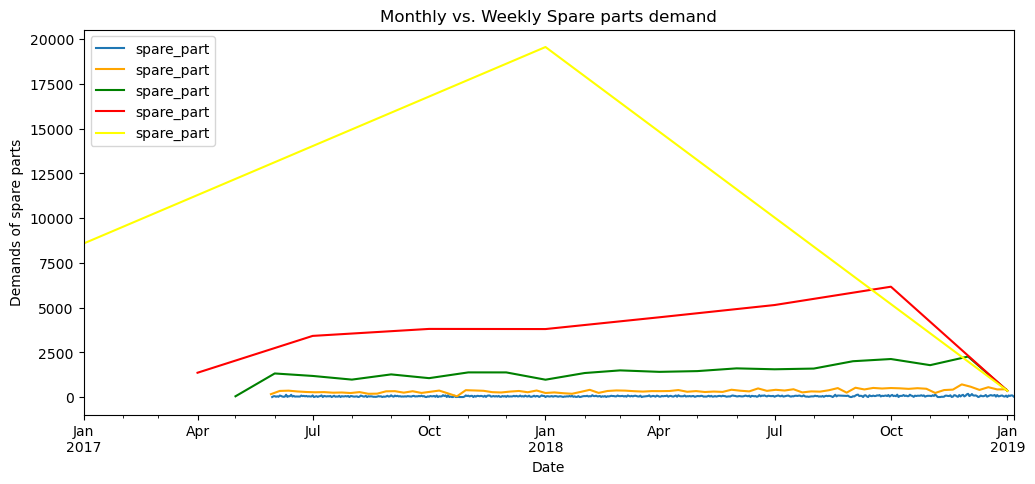

In [45]:
#plot the weekly demand and monthly demand on same view

fig, ax = plt.subplots(figsize=(12, 5))

# Plot the upsampled sampled
daily_df.plot(ax=ax, label='Daily Demand')

# Plot the down data 
weekly_df.plot(ax=ax, label='Weekly Demand', color='orange')

# Plot the down data 
monthly_df.plot(ax=ax, label='Monthly Demand', color='green')

# Plot the down data 
quarter_df.plot(ax=ax, label='Quarter Demand', color='red')

# Plot the down data 
yearly_df.plot(ax=ax, label='Yearly Demand', color='yellow')
# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Demands of spare parts')
ax.set_title('Monthly vs. Weekly Spare parts demand')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

<Axes: xlabel='Yearly'>

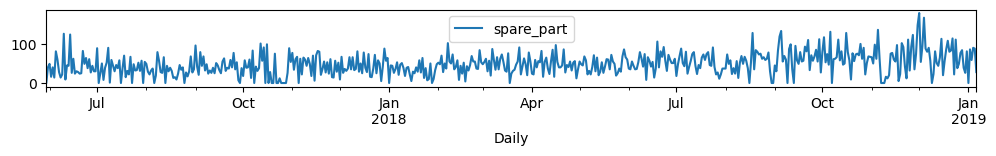

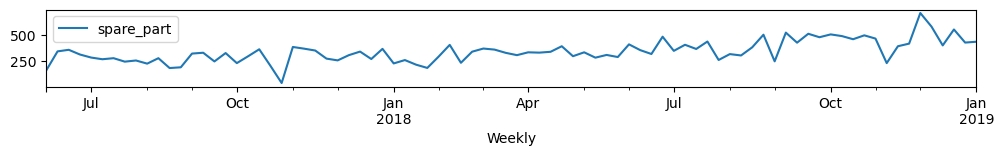

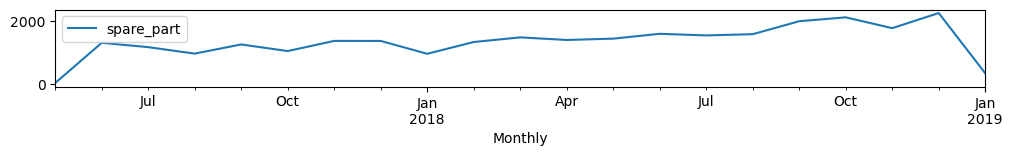

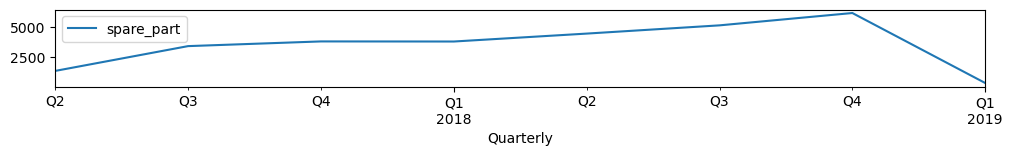

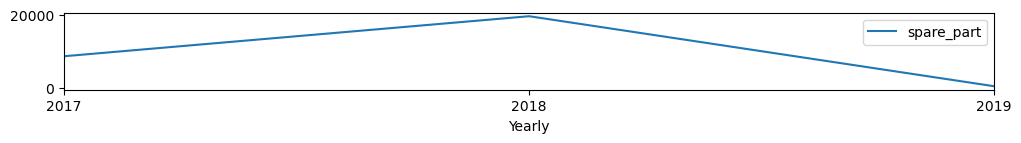

In [46]:
# Set the figure size
# Plotting the weekly data
daily_df.plot(figsize=(12,1),xlabel='Daily')
weekly_df.plot(figsize=(12,1),xlabel='Weekly')
monthly_df.plot(figsize=(12,1),xlabel='Monthly')
quarter_df.plot(figsize=(12,1),xlabel= 'Quarterly')
yearly_df.plot(figsize=(12,1),xlabel='Yearly')

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Plotting the daily data </i> </b></span>


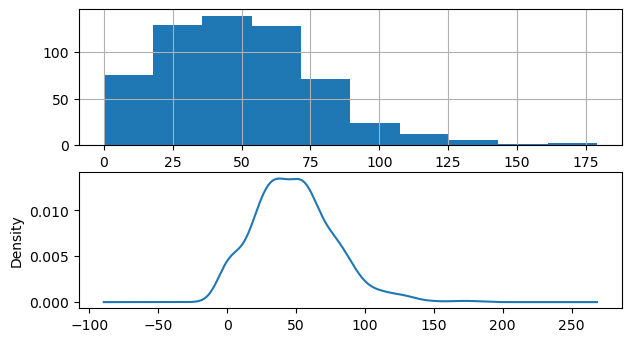

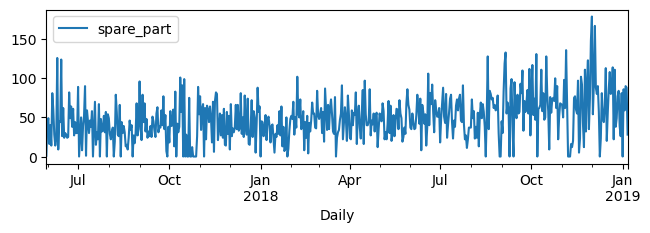

In [47]:
plt.figure(figsize=(7,6))
plt.subplot(311)
daily_df.spare_part.hist()
plt.subplot(312)
daily_df.spare_part.plot(kind='kde')
daily_df.plot(figsize=(7.5,2),xlabel='Daily')
plt.show()

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Plotting the Weekly data </i> </b></span>


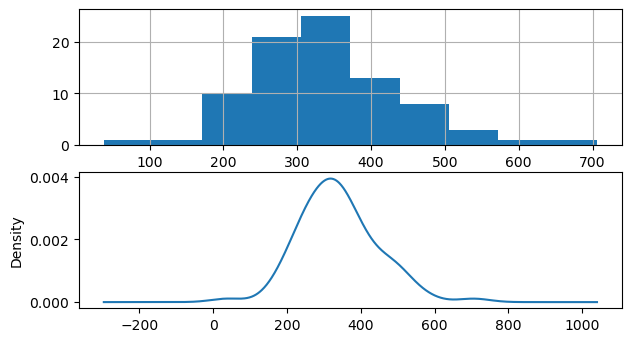

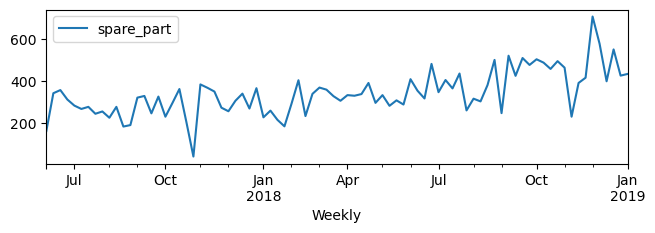

In [48]:
plt.figure(figsize=(7,6))
plt.subplot(311)
weekly_df.spare_part.hist()
plt.subplot(312)
weekly_df.spare_part.plot(kind='kde')
weekly_df.plot(figsize=(7.5,2),xlabel='Weekly')
plt.show()

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Plotting the Monthly data </i> </b></span>


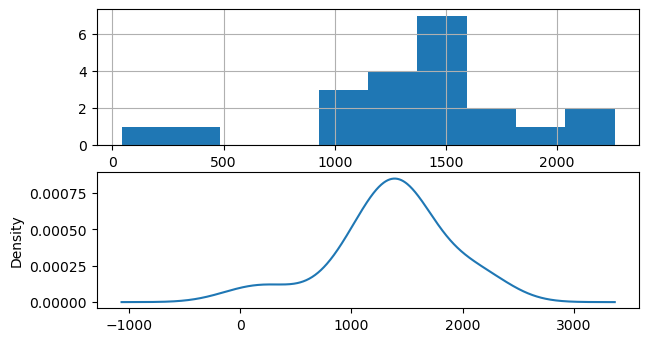

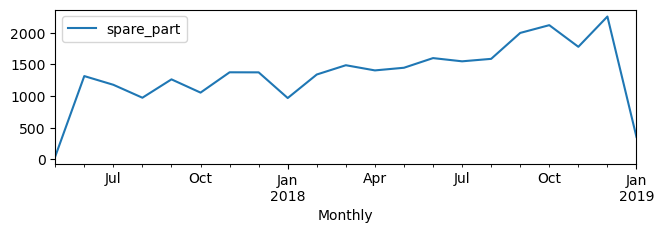

In [49]:
plt.figure(figsize=(7,6))
plt.subplot(311)
monthly_df.spare_part.hist()
plt.subplot(312)
monthly_df.spare_part.plot(kind='kde')
monthly_df.plot(figsize=(7.5,2),xlabel='Monthly')
plt.show()

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Plotting the Quarterly data </i> </b></span>


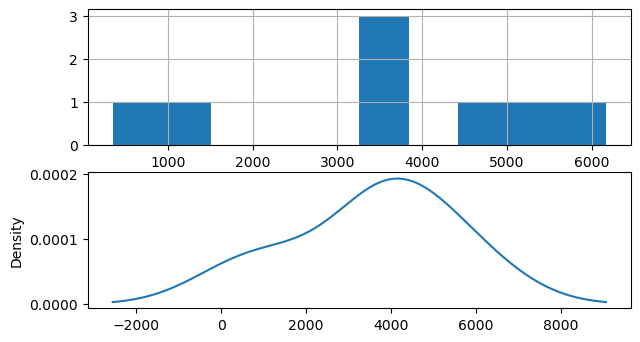

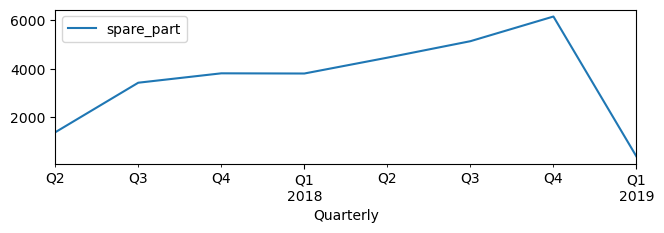

In [50]:
plt.figure(figsize=(7,6))
plt.subplot(311)
quarter_df.spare_part.hist()
plt.subplot(312)
quarter_df.spare_part.plot(kind='kde')
quarter_df.plot(figsize=(7.5,2),xlabel='Quarterly')
plt.show()

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Plotting the Yearly data </i> </b></span>


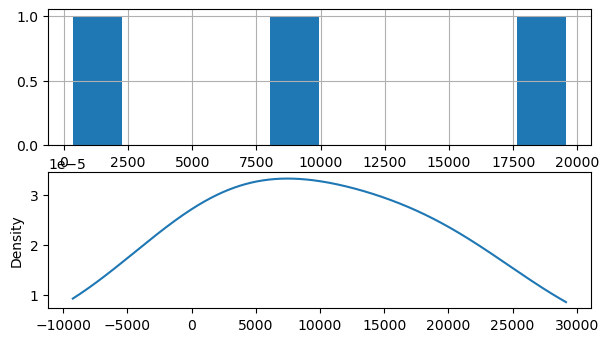

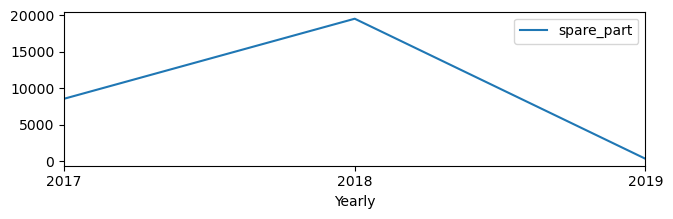

In [51]:
plt.figure(figsize=(7,6))
plt.subplot(311)
yearly_df.spare_part.hist()
plt.subplot(312)
yearly_df.spare_part.plot(kind='kde')
yearly_df.plot(figsize=(7.5,2),xlabel='Yearly')
plt.show()

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Decomposing :  deconstructs a time series into several components <br>   
* The components are trend, seasonal, and residual. <br> 
* model='additive' : The additive model is useful when the seasonal variation is relatively constant over time. <br>
* model='multiplicative' : The multiplicative model is useful when the seasonal variation increases over time.</i> </b></span>


<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Decomposing :  model='multiplicative' <br>   
</i> </b></span>


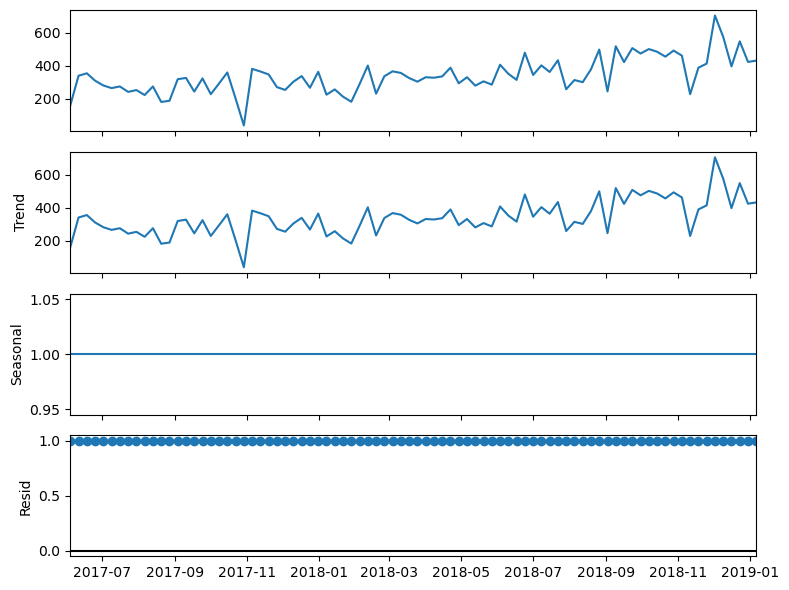

In [52]:
rcParams['figure.figsize'] = 8, 6
decomposition = seasonal_decompose(weekly_df, model='multiplicative',period=1)
fig = decomposition.plot()
plt.show()

In [53]:
#https://community.sap.com/t5/technology-blogs-by-sap/identification-of-seasonality-in-time-series-with-python-machine-learning/ba-p/13472664

In [54]:
#https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one

<span style="color:#00FF7F ;font-size:18pt;font-family: Arial Black;"><b> <i> Decomposing :  model='additive' <br>   
</i> </b></span>


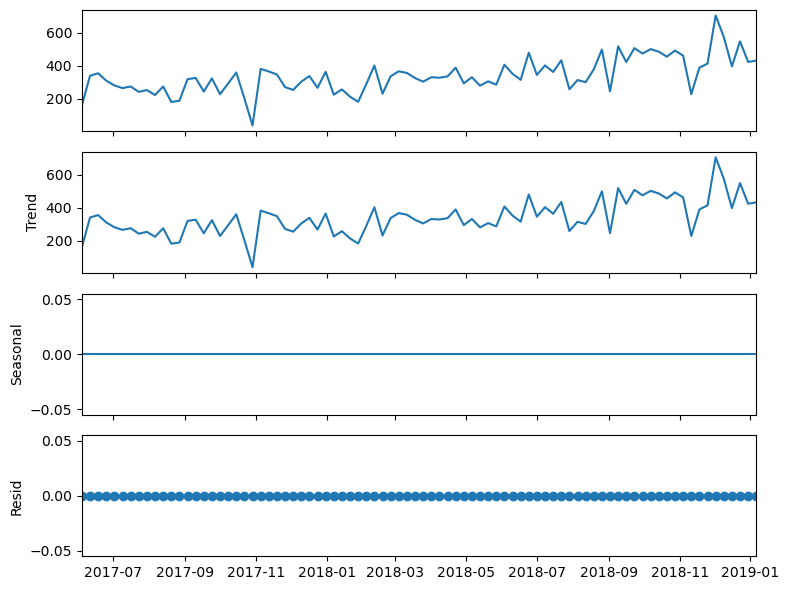

In [55]:
rcParams['figure.figsize'] = 8, 6
decomposition = seasonal_decompose(weekly_df, model='additive',period=1)
fig = decomposition.plot()
plt.show()


In [56]:
# Trend : Very mild positive trend and  random pattern is shown.
# Seasionality : Analyzing the chart, we can observe that the time-series has seasonality pattern.
#The dataset contains mild positive trend but no obvious seasonal component.

<span style="color:#00FF7F;font-size:20pt;font-family: Arial Black;"> <b> <i> Checking for stationarity - Method 1: Plotting the value of the ACF.</i> </b> </span>



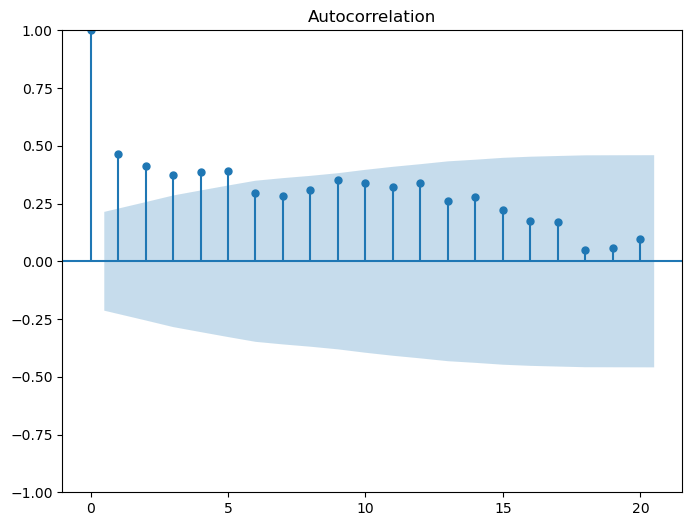

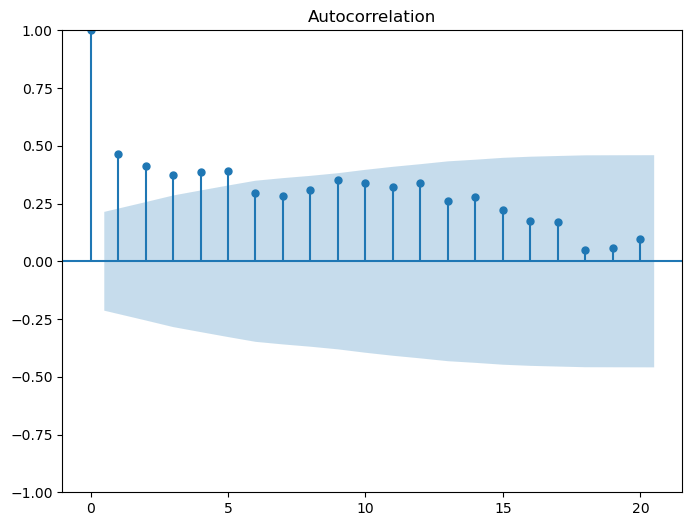

In [57]:
# Plotting the autocorrelation function

plot_acf(weekly_df)

<span style="color:#00BFFF;font-size:20pt;font-family: Arial Black;"> <i> Insight :</i><br> </span>
<span style="color:#E238EC;font-size:15pt;font-family:  cursive;"> <i> <br> <b>
    * From the autocorrelation plot , it is clear that the given series is not stationary. <br>
    * Further , We can perform the ADfuller test <br>
    * It is a test based on hypothesis,where if the p-value is less than 0.05, then we can consider the
      time series is stationary, and if the P-value is greater than 0.05, then the time series is non-stationary.<br><br>  
    </b> </i> </span>

<span style="color:#00FF7F;font-size:20pt;font-family: Arial Black;"> <b> <i> ADfuller test.</i> </b> </span>


In [58]:
ad_fuller = adfuller(weekly_df.spare_part,autolag='AIC')
print("1. ADF : ",ad_fuller[0])
print("2. P-Value : ", ad_fuller[1])
print("3. Num Of Lags : ", ad_fuller[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", ad_fuller[3])
print("5. Critical Values :")
for key, val in ad_fuller[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.3967170203563224
2. P-Value :  0.5838490042771485
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 79
5. Critical Values :
	 1% :  -3.5159766913976376
	 5% :  -2.898885703483903
	 10% :  -2.5866935058484217


P-value is higher for our dataset, and we can say that the evidence of rejecting the null hypothesis is low; hence the time series is non-stationary.

<span style="color:#00BFFF;font-size:20pt;font-family: Arial Black;"> <i> Insight :</i><br> </span>
<span style="color:#E238EC;font-size:15pt;font-family:  cursive;"> <i> <br><b>
    * From the AdFuller test , we can see that the P-Value is "0.5838892498077408".<br> 
    * P-Value is  greater than "0.05".<br>
    * We can say that the evidence of rejecting the null hypothesis is low.<br>
    * Hence the time series is evidently non-stationary.<br><br>  
    </b> </i> </span>


<span style="color:#00FF7F;font-size:20pt;font-family: Arial Black;"> <b> <i> To make it stationary by taking difference of 1.</i> </b> </span>


In [59]:
weekly_df_diff=weekly_df.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply,
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [60]:
weekly_df_diff

,spare_part
date,
2017-06-04,NaN
2017-06-11,180.0
2017-06-18,15.0
2017-06-25,-45.0
2017-07-02,-29.0
...,...
2018-12-09,-130.0
2018-12-16,-179.0
2018-12-23,152.0


<span style="color:#00FF7F;font-size:20pt;font-family: Arial Black;"> <b> <i> Discarding the NULL value </i> </b> </span>

In [61]:
weekly_df_diff = weekly_df_diff.iloc[1: ]
weekly_df_diff

,spare_part
date,
2017-06-11,180.0
2017-06-18,15.0
2017-06-25,-45.0
2017-07-02,-29.0
2017-07-09,-16.0
...,...
2018-12-09,-130.0
2018-12-16,-179.0
2018-12-23,152.0


<span style="color:#00FF7F;font-size:20pt;font-family: Arial Black;"> <b> <i> Plot the weekly data after differencing. : </i> </b> </span>


<Axes: xlabel='date'>

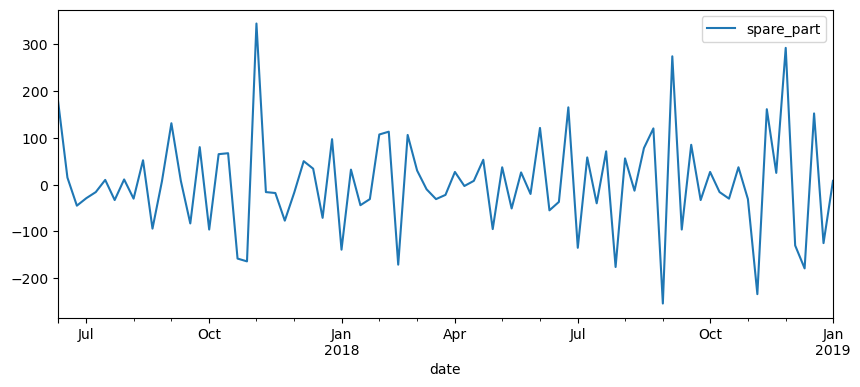

In [62]:
# Set the figure size
# Plotting the weekly data
weekly_df_diff.plot(figsize=(10,4))

<span style="color:#00BFFF;font-size:20pt;font-family: Arial Black;"> <i> Insight :</i><br> </span>
<span style="color:#E238EC;font-size:15pt;font-family:  cursive;"> <i> <br> <b>
    * From the above plot , After 1 differencing , it is clear that the series is now stationary.<br> 
    * Still we can plot the ACF to confirm if the series is stationary after 1 differencing.
    </b> </i> </span>

<span style="color:#00FF7F;font-size:20pt;font-family: Arial Black;"> <b> <i> Ploting ACF after 1 defferencing : </i> </b> </span>

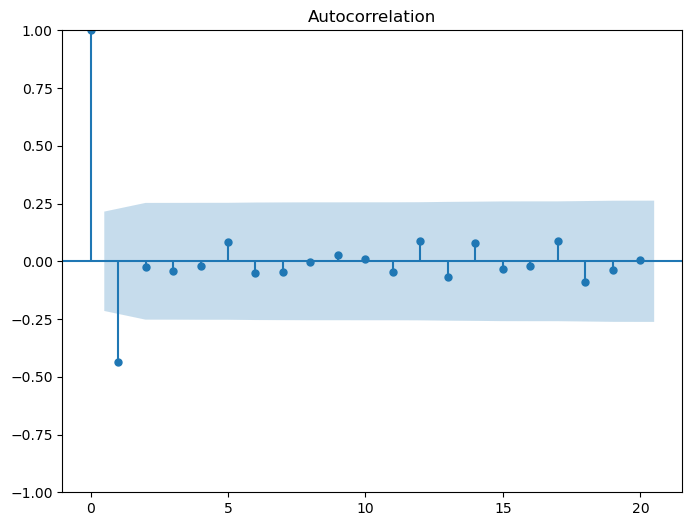

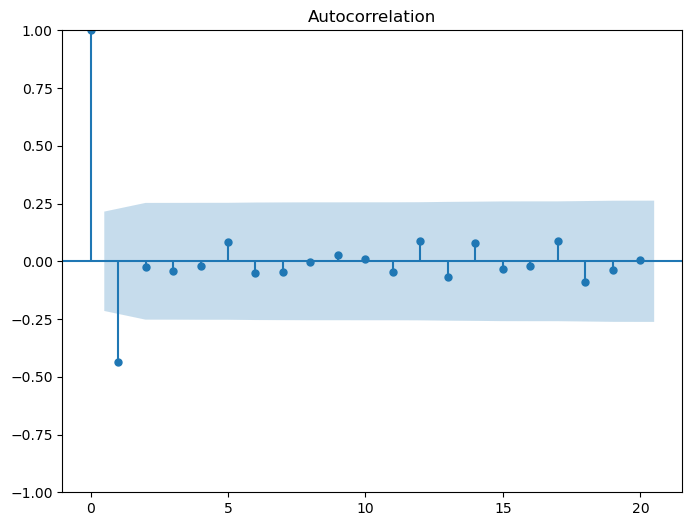

In [63]:
plot_acf(weekly_df_diff)

<span style="color:#00BFFF;font-size:20pt;font-family: Arial Black;"> <i> Insight :</i><br> </span>
<span style="color:#E238EC;font-size:15pt;font-family:  cursive;"> <i> <br> <b>
    * From the autocorrelation plot , After 1 differencing , it is clear that the series is  now stationary. <br>  
    * So now the data is ready for modeling and forecasting for future dates. <br>  
    </b> </i> </span>

<span style="color:#864AF9;font-size:23pt"> <b> Univariate Time Series Forecasting   </b> </span>  

Since we are done with Analysis of our data. We also checked for stationarity and then we introduced first order differencing to make the time series stationary.

We can now move ahead for modeling and forecasting for future dates.

We have a lot of options while doing model selection like we can use Auto Regression(AR), Autoregressive Moving Average(ARMA) or Autoregressive Integreted Moving Average(ARIMA) and seasonal autoregressive integrated moving average models (SARIMA) .




<span style="color:#864AF9;font-size:23pt"> <b> Train/Test Split   </b> </span>  


In [64]:
weekly_df_diff.shape

(83, 1)

In [65]:
X = weekly_df_diff

# Calculate the split point based on an 80:20 ratio
split_point = round(len(weekly_df_diff) * 80/100)

# Split the data into train and test sets
train_data = X[:split_point]
test_data = X[split_point:]

# print the lengths of the train and test sets
print('Train data length:', len(train_data))
print('Test data length:', len(test_data))

Train data length: 66
Test data length: 17


In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2017-06-11 to 2018-09-09
Freq: W-SUN
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   spare_part  66 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


In [67]:
def modelEvaluation(test,prediction):
    mse = mean_squared_error(test, prediction)
    mae = mean_absolute_error(test, prediction)
    rmse = math.sqrt(mse)
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    
    metrics = { 'Root mean squared error (rmse)' : rmse,
                'mean_absolute_error (mae) : ' : mae 
                }
    
    return metrics

In [68]:
def modelEvaluation_mse(test,prediction):
    mse = mean_squared_error(test, prediction)
    
    print(f'Mean Squared Error: {mse}')
    
    metrics_mse = { 'Mean Squared Error (mse) : ' : mse               
                }
    
    return metrics_mse

<span style="color:#00FF7F;font-size:20pt;font-family: Arial Black;"> <b> <i> Autoregressive Moving Average (ARMA) : </i> </b> </span>


In [69]:
#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

mod = ar_select_order(train_data,maxlag=15,glob=True)
mod.ar_lags

[1, 2, 15]

In [70]:
## Applying autoregressive model
## model creation

ARMA_model = AutoReg(train_data,lags=[1,2,15])

# fit model
ARMA_model = ARMA_model.fit()
# make prediction
ARMA_model_ypred = ARMA_model.predict(start=66,end=82)
#print("ARMA Model : ", ARMA_model_ypred)

ARMA_model_metrics = modelEvaluation(test_data,ARMA_model_ypred)
ARMA_model_metrics_mse =  modelEvaluation_mse(test_data,ARMA_model_ypred)

Root Mean Squared Error: 170.19201639707373
Mean Absolute Error: 128.9480967256174
Mean Squared Error: 28965.32244530181


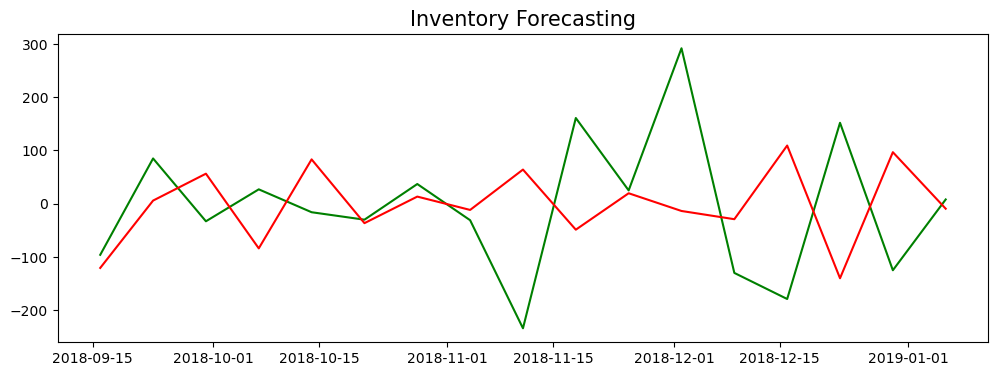

In [71]:
# Plotting the test and ypred
plt.figure(figsize=(12,4))
plt.title('Inventory Forecasting', fontsize=15)
#plt.plot(train_data, label='Train')
plt.plot(test_data , label='Test',color='green')
plt.plot(ARMA_model_ypred,label='Prediction',color='red') #graph of test vs prediction

<span style="color:#00FF7F;font-size:20pt;font-family: Arial Black;"> <b> <i> Autoregressive Integrated Moving Average (ARIMA) : </i> </b> </span>

## Getting the optimal values of p,q an d
p - It is the order of autoregressive model
q - It is the degree of differencing
d - It is the order of moving-average model


In [72]:
p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

list1=[]
list2=[]

for params in pdq: #iterating params over pdq
    try:       
        ARIMA_model_pqd = ARIMA(train_data, order=params)#training model on various pdq values       
        ARIMA_model_pqd_fit = ARIMA_model_pqd.fit()#training        
        print(params, ARIMA_model_pqd_fit.aic)#printing parameter and aic values        
        list1.append(params)
        list2.append(ARIMA_model_pqd_fit.aic)
    except:
        continue

(0, 0, 0) 799.982309149748
(0, 0, 1) 759.1738190691685
(0, 0, 2) 760.9700375615106
(0, 0, 3) 762.6495608700587
(0, 0, 4) 764.5174876447634
(0, 1, 0) 851.7931368546199
(0, 1, 1) 793.0664070522504
(0, 1, 2) 756.8327925164219
(0, 1, 3) 758.7683847969649
(0, 1, 4) 760.5257003827992
(0, 2, 0) 909.158355457306
(0, 2, 1) 845.7273260280853
(0, 2, 2) 791.7809892847147
(0, 2, 3) 760.6676853882745
(0, 2, 4) 762.654744452706
(0, 3, 0) 967.7574533312528
(0, 3, 1) 901.6100331050412
(0, 3, 2) 842.4823477738728
(0, 3, 3) 793.4066441757335
(0, 3, 4) 769.3840510813634
(0, 4, 0) 1027.6768468632442
(0, 4, 1) 958.4775264640341
(0, 4, 2) 896.4327759139566
(0, 4, 3) 841.6910904418631
(0, 4, 4) 798.5299195615281
(1, 0, 0) 785.6223733654206
(1, 0, 1) 760.9974904464115
(1, 0, 2) 762.9685606013088
(1, 0, 3) 764.8339574609217
(1, 0, 4) 766.3785651253618
(1, 1, 0) 822.9561103692648
(1, 1, 1) 779.7505009374606
(1, 1, 2) 758.777006073512
(1, 1, 3) 760.6751524247337
(1, 1, 4) 762.65118692415
(1, 2, 0) 869.66954321792

In [73]:
# Printing the lowest aic score
# Lowest the aic score , better the model.
print(min(list2))
# pdq corresponding to lowest aic
loc=list2.index(min(list2))
print(list1[loc])

756.8327925164219
(0, 1, 2)


In [74]:
##Model object creation and fitting the model
# fit model
ARIMA_model = ARIMA(train_data, order=(1, 1, 3))
ARIMA_model_fit = ARIMA_model.fit()
#print(ARIMA_model_fit.summary())

Root Mean Squared Error: 124.20352330502867
Mean Absolute Error: 93.9004942509855
Mean Squared Error: 15426.515201382801


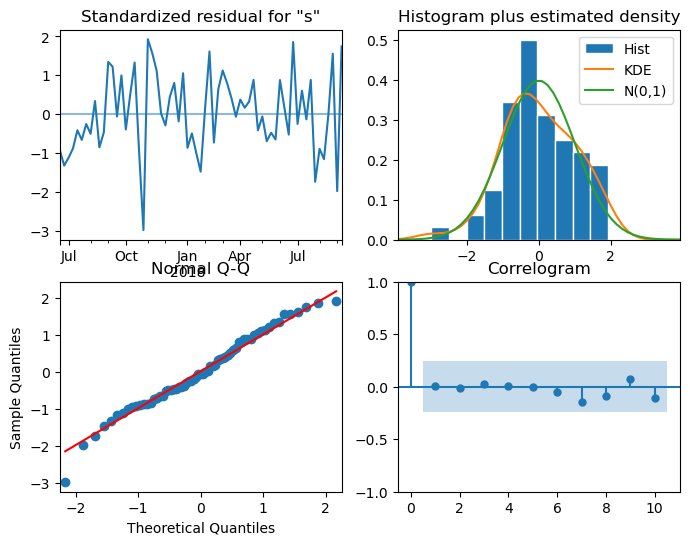

In [75]:
import math
ARIMA_model_forecast = ARIMA_model_fit.forecast(steps=17)
#ARIMA_model_forecast

#modelEvaluation(test_data,ARIMA_model_forecast)

ARIMA_model_diag = ARIMA_model_fit.plot_diagnostics()
ARIMA_model_diag

ARIMA_model_metrics = modelEvaluation(test_data,ARIMA_model_forecast)
ARIMA_model_metrics_mse =  modelEvaluation_mse(test_data,ARIMA_model_forecast)

<span style="color:#00BFFF;font-size:20pt;font-family: Arial Black;"> <b> <i>Insight: </i> </b> </span>
<span style="color:#E238EC;font-size:15pt;font-family:  cursive;"> <i> <br> <b>
    * We can see that the distribution does have a Gaussian look <br>  
    * From the above plot , residuals are normally distributed.<br>
    * We can observe that the correlations are very low (the y axis goes from +1.0 to 0) and don't seem to have a pattern.<br>
    </b> </i> </span>

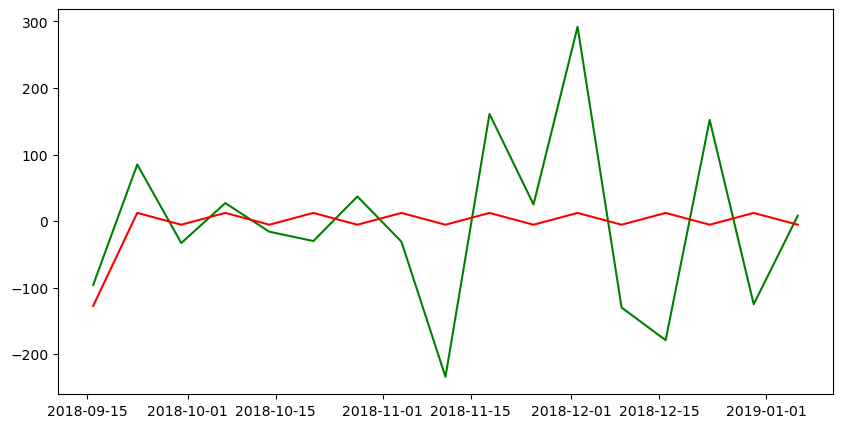

In [76]:
# Comparision of actual vs predicted 

plt.figure(figsize=(10,5))
plt.plot(test_data[:17] , color='green')
plt.plot(ARIMA_model_forecast,color='red')#line plot for prediction

<span style="color:#00FF7F;font-size:20pt;font-family: Arial Black;"> <b> <i>Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) : </i> </b> </span>

<span style="color:#E238EC;font-size:15pt;font-family:  cursive;"> <i> <br> <b>
    * The seasonal_order parameters of SARIMA are the same as for ARIMA. <br>  
    * But the last one includes the period of the season. <br>  
    </b> </i> </span>
    
    
    

In [77]:
SARIMAX_model = SARIMAX(train_data,order=(0,1,2) , seasonal_order=(1,2,1,10)) # 1,2,1,4
SARIMAX_model_fit = SARIMAX_model.fit()

Root Mean Squared Error: 125.56832441642017
Mean Absolute Error: 95.7916313289086
Mean Squared Error: 15767.404096747341


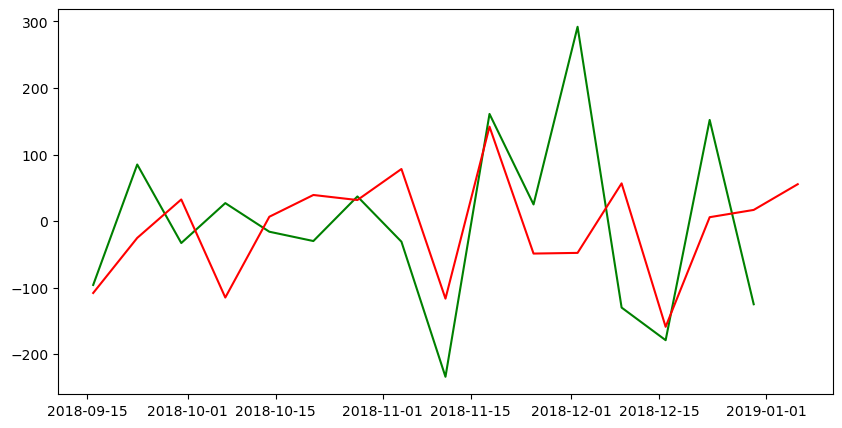

In [78]:
SARIMAX_model_forecast = SARIMAX_model_fit.predict(start=66,end=82,dynamic=True)

#modelEvaluation(test_data,SARIMAX_model_forecast)
SARIMAX_model_metrics = modelEvaluation(test_data,SARIMAX_model_forecast)
SARIMAX_model_metrics_mse =  modelEvaluation_mse(test_data,SARIMAX_model_forecast)

# Comparision of actual vs predicted for 16 values

plt.figure(figsize=(10,5))
plt.plot(test_data[:16] , color='green')
plt.plot(SARIMAX_model_forecast,color='red')#line plot for prediction

<span style="color:#00FF7F;font-size:20pt;font-family: Arial Black;"> <b> <i> Model Evaluation (MSE) : </i> </b> </span>



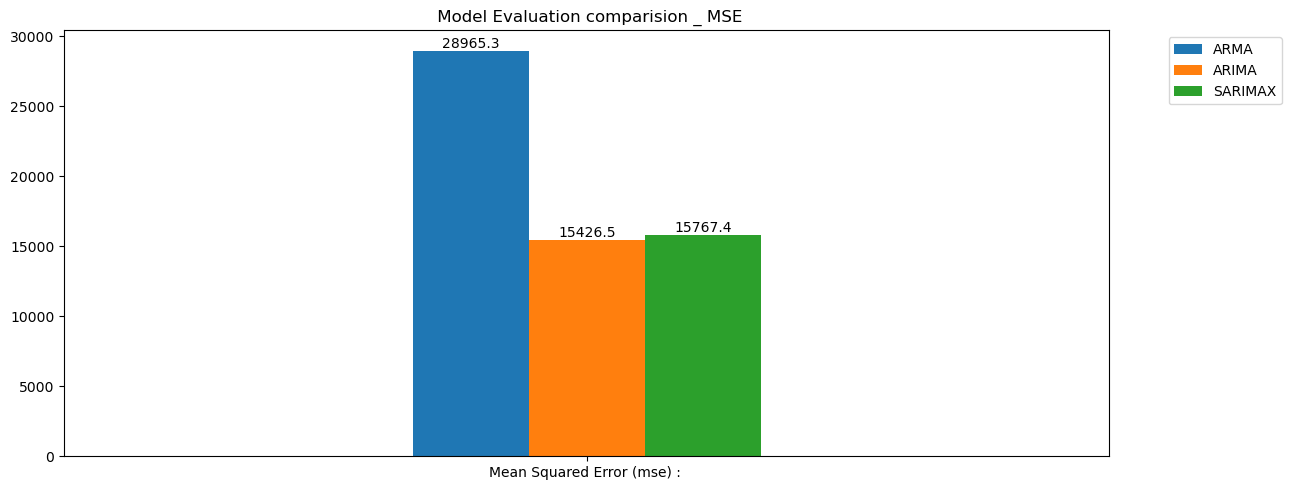

In [79]:
metrics_mse = pd.DataFrame({'ARMA' : ARMA_model_metrics_mse,                        
                        'ARIMA' : ARIMA_model_metrics_mse,
                        'SARIMAX' : SARIMAX_model_metrics_mse})
                        


ax = metrics_mse.plot.bar(figsize=(13,5) ,  width = 0.25);
for bars in ax.containers:
    ax.bar_label(bars)
ax.tick_params(axis='x', labelrotation = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(" Model Evaluation comparision _ MSE") 
plt.tight_layout()
plt.show()

<span style="color:#00FF7F;font-size:20pt;font-family: Arial Black;"> <b> <i> Model Evaluation (RMSE) & (MAE) : </i> </b> </span>


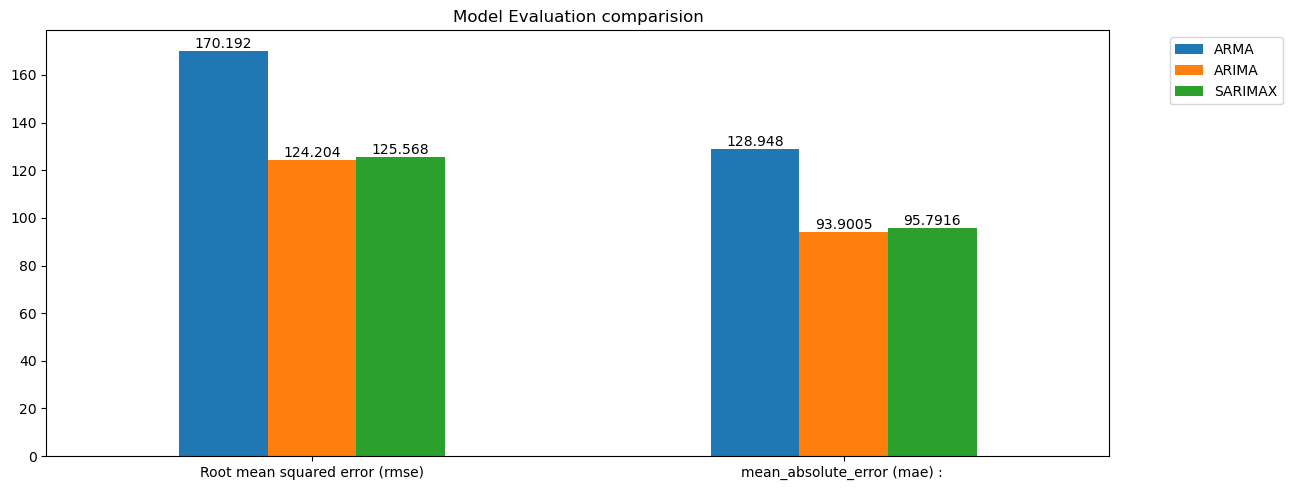

In [80]:
metrics = pd.DataFrame({'ARMA' : ARMA_model_metrics,                       
                        'ARIMA' : ARIMA_model_metrics,
                        'SARIMAX' : SARIMAX_model_metrics})
                        


ax = metrics.plot.bar(figsize=(13,5));
for bars in ax.containers:
    ax.bar_label(bars)
ax.tick_params(axis='x', labelrotation = 0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Model Evaluation comparision") 
plt.tight_layout()
plt.show()

<span style="color:#00BFFF;font-size:20pt;font-family: Arial Black;"> <i> Final Observations : <br> </i> </span> <br>
<span style="color:#E238EC;font-size:15pt;font-family:  cursive;"> <i> <b>
    * The Inventory forcasting dataset is a time series dataset.<br> 
    * There are 28482 rows.<br>
    * There are 7 columns.<br>
    * The columns are invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,
      invoice_line_text.<br>
    * Choosing the job_card date since it contains all the details about the vehicle , servicing , the mechanic details,date for servicing, the date when the servicing is done,the details about the problems encountered by the customer.<br>
    * Observed that "ENGINE OIL,CHAIN LUBRICATION,GENERAL SERVICE,AIR FILTER,3M OIL,CONSUMABLES,POLISH,DISC OIL,BRAKE SHOE,OIL FILTER" are top 10  spares wanted by the customers. So advicing to have them in stock always.    
    </b></i> </span>

<span style="color:#00BFFF;font-size:20pt;font-family: Arial Black;"> <i> Conclusion : <br> </i> </span> <br>
<span style="color:#E238EC;font-size:15pt;font-family:  cursive;"> <i> <b>
    * The Inventory forcasting dataset is a time series dataset.<br> 
    * Using ACF plot and ADF test , found that The data set was not stationary. <br>
    * So by taking differencing , made is stationary.<br>
    * Implemented ARMA, ARIMA and SARIMAX model.<br>
    * Used MSE,RMSE and MAE to evaluate the model performance.<br>
    * Among all models , Both ARIMA and SARIMAX results were close by . Still there were mild difference in which ARIMA gave 
      better result.<br>
    * So recommending ARIMA model.<br>    
    </b></i> </span>

<span style="color:#00BFFF;font-size:20pt;font-family: Arial Black;"> <i> Challenges faced : <br> </i> </span> <br>
<span style="color:#E238EC;font-size:15pt;font-family:  cursive;"> <i> <b>
    * The  Inventory forcasting  dataset is a challenging and time series dataset.<br>
    * Observed that service related data were found in the spare parts column , which can confuse the model to do 
      the right prediction of inventory forcasting. So recommending to input the right details with correct spellings and
      taking care of space(empty) in the values.<br>
    * There were no seasonality found in the data set.<br>
    * There is very very mild upward trend.<br>
    * other Combination of pdq values with aic score gave better result than the one that model suggested.<br>    
    </b></i> </span>

# 